In [33]:
import os
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr
import glob
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [35]:
data_dir ='./Original_Classify'
ori_dir = '/Ori_1_9/'
conv_dir = '/Ori_10/'
def get_images(directory):
    x = []
    y = []
    png_files = glob.glob(data_dir+directory+'*/*.png') #read all the images
    for png_file in png_files:
        png_image = cv2.imread(png_file, 0)
        x.append(png_image)
        y.append(png_file.split('/')[-1][:4])
    return x, y
/Users/fuchunhsieh/Desktop/HomeWork/CSC-481/Audio Project/Original_Classify/Ori_1-9/p225/p225_001.png

In [36]:
X_train, y_train = get_images(ori_dir)
X_test, y_test = get_images(conv_dir)

In [43]:
print(X_train, y_train)

[] []


In [38]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# print(y_train.shape)

In [39]:
#preprocessing
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train/255.0
X_test = X_test/255.0

In [40]:
#showing the array or image
#print([*X_train[0]])

In [41]:
print(X_train.shape)

(0,)


In [42]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape(nsamples, nx*ny)
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape(nsamples, nx*ny)

ValueError: not enough values to unpack (expected 3, got 1)

In [ ]:
print(type(X_train[0]))
print(X_train.shape)

<class 'numpy.ndarray'>
(40, 307200)


0.125
              precision    recall  f1-score   support

        p225       0.25      1.00      0.40         1
        p226       0.00      0.00      0.00         2
        p227       0.00      0.00      0.00         4
        p228       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.06      0.25      0.10         8
weighted avg       0.03      0.12      0.05         8



/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

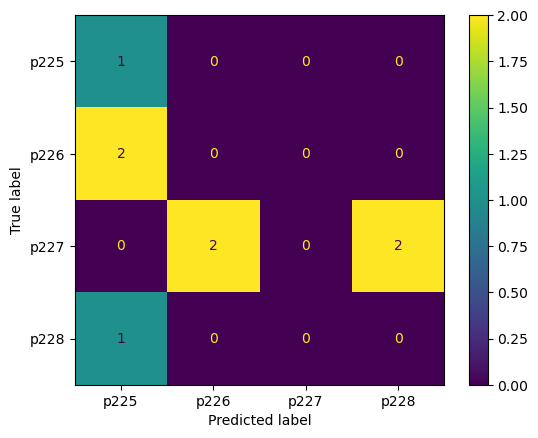

In [ ]:
#training decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['p225', 'p226', 'p227' ,'p228'])
disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
confusion_matrix(y_pred, y_test)

0.375
              precision    recall  f1-score   support

        p225       1.00      0.33      0.50         3
        p226       1.00      0.40      0.57         5
        p227       0.00      0.00      0.00         0
        p228       0.00      0.00      0.00         0

    accuracy                           0.38         8
   macro avg       0.50      0.18      0.27         8
weighted avg       1.00      0.38      0.54         8



/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fuchunhsieh/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1, 0, 1, 1],
       [0, 2, 3, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])